# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from iminuit import Minuit
import iminuit

In [3]:
iminuit.__version__

'2.2.0'

In [4]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [5]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [6]:
filename_logbook='logbooks/auxtellogbook_2021_v1.csv'

In [7]:
df=pd.read_csv(filename_logbook)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,exposure,focus,seeing,pressure,temperature,humidity,windspd
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,90.0,-0.034843,NaN,743.10,10.3,51.0,9.3
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,90.0,0.000000,NaN,742.80,10.4,45.0,9.9
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,6.0,0.000000,NaN,742.30,8.8,53.0,7.3
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,6.0,0.000000,NaN,742.25,8.7,55.0,6.7


# Selection of input file

In [10]:
dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [11]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [12]:
# 2021/03/31
#filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits' reconstruit à moitié
#filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'
#filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' BOUGE
#filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' BOUGE
#filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' BOUGE
#filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BOUGE
#filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BOUGE
#filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
#filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits' GOOD
#filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' BAD FOCUS
#filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' BAD FOCUS

# 2021/04/01

#filename_image=df['file'][2] # 'Cor_holo4_003_NGC4755_2021-02-17_350.fits'  GOOD PSF
#filename_image=df['file'][3] # 'Cor_holo4_003_NGC4755_2021-02-17_351.fits'  GOOD PSF
#filename_image=df['file'][4] # 'Cor_holo4_003_NGC4755_2021-02-17_352.fits'  GOOD PSF
#filename_image=df['file'][5] # 'Cor_holo4_003_NGC4755_2021-02-17_353.fits'  GOOD PSF
#filename_image=df['file'][6] # 'Cor_holo4_003_NGC4755_2021-02-17_354.fits'  GOOD PSF
#filename_image=df['file'][7] # 'Cor_holo4_003_NGC4755_2021-02-17_355.fits'  GOOD PSF
#filename_image=df['file'][8] # 'Cor_holo4_003_NGC4755_2021-02-17_356.fits'  GOOD PSF
#filename_image=df['file'][9] # 'Cor_holo4_003_NGC4755_2021-02-17_357.fits'  GOOD PSF
#filename_image=df['file'][10] # 'Cor_holo4_003_NGC4755_2021-02-17_358.fits'  GOOD PSF
#filename_image=df['file'][11] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_556.fits'  GOOD PSF
#filename_image=df['file'][12] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_557.fits'  defocused, failed
#filename_image=df['file'][13] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_558.fits'  defocused, failed
#filename_image=df['file'][14] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_559.fits'  good, but central star
#filename_image=df['file'][15] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits'  bad psf, but looks good
#filename_image=df['file'][16] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_561.fits'  Very good
#filename_image=df['file'][17] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_562.fits'  Very good
#filename_image=df['file'][18] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_563.fits'  Very good
#filename_image=df['file'][19] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_564.fits'  Fit bizare
#filename_image=df['file'][20] # 'Cor_holo4_003_empty_HD60753_2021-02-18_566.fits'  Very good
#filename_image=df['file'][21] # 'Cor_holo4_003_empty_HD60753_2021-02-18_567.fits'  Good psf, but rec failed order1/2 separated
#filename_image=df['file'][22] # 'Cor_holo4_003_empty_HD60753_2021-02-18_568.fits'  Good psf,  order1/2 separated
#filename_image=df['file'][23] # 'Cor_holo4_003_empty_HD60753_2021-02-18_569.fits'  Good psf,  order1/2 separ
#filename_image=df['file'][24] # 'Cor_holo4_003_empty_HD60753_2021-02-18_570.fits'  Good psf,  order1/2 separ
#filename_image=df['file'][25] # 'Cor_holo4_003_empty_HD60753_2021-02-18_571.fits'  Good psf, failed , order1/2 separ
#filename_image=df['file'][26] # 'Cor_holo4_003_empty_HD60753_2021-02-18_572.fits'  Good psf, good rec,order1/2 separ
#filename_image=df['file'][27] # 'Cor_holo4_003_empty_HD60753_2021-02-18_573.fits'  Bad psf, order1/2 separ
#filename_image=df['file'][28] # 'Cor_holo4_003_empty_HD60753_2021-02-18_574.fits'  Bad psf, order1/2 separ
#filename_image=df['file'][29] # 'Cor_holo4_003_empty_HD60753_2021-02-18_575.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][30] # 'Cor_holo4_003_empty_HD60753_2021-02-18_576.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][31] # 'Cor_holo4_003_empty_HD60753_2021-02-18_577.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][32] # 'Cor_holo4_003_empty_HD60753_2021-02-18_578.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][33] # 'Cor_holo4_003_empty_HD60753_2021-02-18_579.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][34] # 'Cor_holo4_003_empty_HD60753_2021-02-18_580.fits'   Bad psf, order1/2 separ
#filename_image=df['file'][35] # 'Cor_holo4_003_empty_HD60753_2021-02-18_581.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][36] # 'Cor_holo4_003_empty_HD60753_2021-02-18_582.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][38] # 'Cor_holo4_003_empty_HD60753_2021-02-18_584.fits'   Bad psf, order1/2 separ, bad rec ?
#filename_image=df['file'][39] # 'Cor_holo4_003_empty_HD60753_2021-02-18_585.fits'   Bad psf, order1/2 separ, bad rec
#filename_image=df['file'][40] # 'Cor_holo4_003_empty_HD60753_2021-02-18_586.fits'   Bad psf, order1/2 separ, good rec 
#filename_image=df['file'][41] # 'Cor_holo4_003_empty_HD60753_2021-02-18_587.fits'   Bad psf, order1/2 separ, good rec
#filename_image=df['file'][42] # 'Cor_holo4_003_empty_HD60753_2021-02-18_588.fits'   Bad Focus, order1/2 separ, good rec
#filename_image=df['file'][43] # 'Cor_holo4_003_empty_HD60753_2021-02-18_590.fits'   NOTHING Bad Focus, order1/2 separ, good rec
#filename_image=df['file'][44] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_591.fits'   BAD Not focued
#filename_image=df['file'][45] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_592.fits'   BAD Not focued
#filename_image=df['file'][46] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_593.fits'   BAD Not focued
#filename_image=df['file'][47] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_594.fits'   BAD Not focued
#filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'   BAD Not focued
#filename_image=df['file'][49] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_166.fits'   bad psf + rec OK
#filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'   bad psf + rec OK
#filename_image=df['file'][51] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_191.fits'   bad psf + rec OK
#filename_image=df['file'][52] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_192.fits'   bad psf + rec OK
#filename_image=df['file'][53] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_193.fits'   bad psf + rec OK
#filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'   bad psf + rec OK
#filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits'   bad psf + rec OK
#filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits'   bad focus bad psf + rec OK
filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits'   bad focus bad psf + rec OK

In [13]:
filename_image

'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits'

In [14]:
file_target(filename_image)

['HD75519']

In [15]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs/"
guess = [250,2600]
disperser_label = "holo4_003"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [16]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [17]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [18]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [19]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

## Show relevant parameters

In [20]:
parameters.OBS_NAME

'AUXTEL'

In [21]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [22]:
parameters.DISTANCE2CCD

174.9980010986328

In [23]:
parameters.LAMBDA_MIN 

563

In [24]:
parameters.LAMBDA_MAX 

1095

In [25]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures"

In [26]:
image.filter_label

'RG610'

In [27]:
image.header["FILTER"]

'RG610'

# Plot image and find the target position

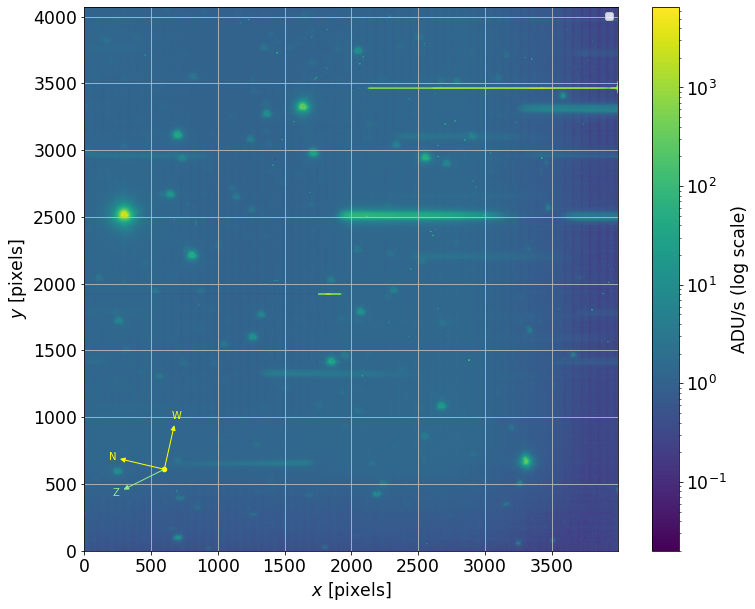

In [28]:
image.plot_image(figsize=(12, 10),scale="log")

In [29]:
#alert False

2021-04-01 20:36:09  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
            c0_0               c1_0                c0_1        
    ------------------- ------------------ --------------------
    0.05199839840431947 0.0518398918133124 0.019786066488450743
2021-04-01 20:36:09  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=1.25e-05.
2021-04-01 20:36:09  Image      find_target_Moffat2D WARNING 
	X=142.71, Y=113.46 target position determination probably wrong: 7.8 pixels from profile detection (150.06, 116.19)


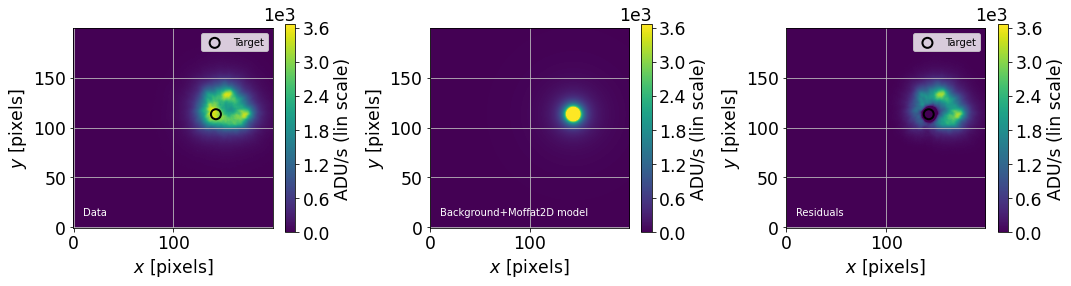

2021-04-01 20:36:10  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=5e-05.


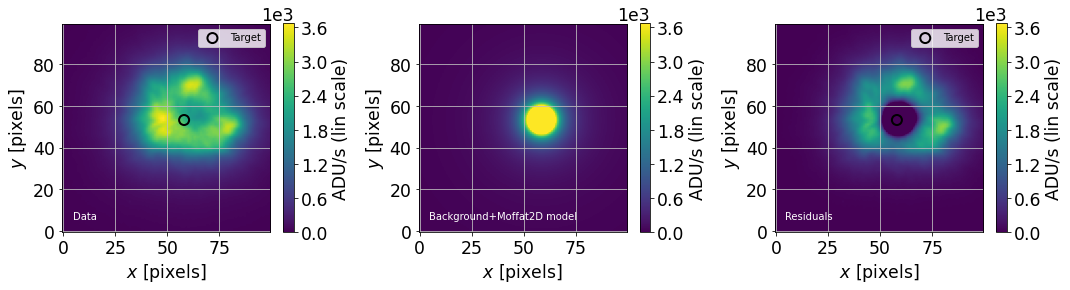

In [30]:
#guess = [2000, 2800]
#guess = [400, 2700] # filename_image=df['file'][37] : Cor_holo4_003_empty_HD60753_2021-02-18_583.fits'
#guess = [300, 2300] #filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'
#guess = [300, 2500] #filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_283.fits'
#guess = [300, 2500] #filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_284.fits' BAD image
#guess = [300, 2500]  #filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_285.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][57] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][58] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_287.fits' MOVED
#guess = [300, 2500]  #filename_image=df['file'][59] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_288.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][60] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_289.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][61] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_290.fits' PLANTE
#guess = [300, 2500]  #filename_image=df['file'][62] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_291.fits' BAD PSF
#guess = [300, 2500]  #filename_image=df['file'][63] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits'  GOOD
#guess = [300, 2500]  #filename_image=df['file'][64] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits' GOOD
#guess = [300, 2500]  #filename_image=df['file'][65] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][66] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][67] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits' GOOD
#guess = [300, 2600]  #filename_image=df['file'][68] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_297.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][69] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_298.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][70] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_299.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][71] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_300.fits' BAD PSF
#guess = [300, 2600]  #filename_image=df['file'][72] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_301.fits' PLANTE
#guess = [300, 2600]  #filename_image=df['file'][73] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_302.fits' PLANTE
#guess = [300, 2600]  #filename_image=df['file'][74] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_303.fits' TOO BAD FOCUS
#guess = [300, 2600]  #filename_image=df['file'][75] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_304.fits' TOO BAD FOCUS


#guess = [750, 2700] #filename_image=df['file'][2] # 'Cor_holo4_003_NGC4755_2021-02-17_350.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][3] # 'Cor_holo4_003_NGC4755_2021-02-17_351.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][4] # 'Cor_holo4_003_NGC4755_2021-02-17_352.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][5] # 'Cor_holo4_003_NGC4755_2021-02-17_353.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][6] # 'Cor_holo4_003_NGC4755_2021-02-17_354.fits' GOOD PSF 
#guess = [750, 2700] #filename_image=df['file'][7] # 'Cor_holo4_003_NGC4755_2021-02-17_355.fits' GOOD PSF
#guess = [750, 2700] #filename_image=df['file'][8] # 'Cor_holo4_003_NGC4755_2021-02-17_356.fits' GOOD PSF
#guess = [700, 1700] #filename_image=df['file'][9] # 'Cor_holo4_003_NGC4755_2021-02-17_357.fits' GOOD PSF
#guess = [500, 1800] #filename_image=df['file'][10] # 'Cor_holo4_003_NGC4755_2021-02-17_358.fits' GOOD PSF
#guess = [300, 2500] #filename_image=df['file'][11] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_556.fits'  GOOD PSF
#guess = [400, 2600] #filename_image=df['file'][12] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_557.fits'  Defocused, failed
#guess = [350, 2600] #filename_image=df['file'][13] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_558.fits' Defoc, failed
#guess = [1800, 2500] #filename_image=df['file'][14] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_559.fits' Good, but central star
#guess = [400, 2500] #filename_image=df['file'][15] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits' bad psf, but seems good
#guess = [400, 2500] #filename_image=df['file'][16] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_561.fits' GOOD PSF
#guess = [400, 2500] #filename_image=df['file'][17] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_562.fits' GOOD PSF
#guess = [400, 2500] #filename_image=df['file'][18] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_563.fits' GOOD PSF
#guess = [400, 2500] #filename_image=df['file'][19] # 'Cor_holo4_003_RG610_HD60753_2021-02-18_564.fits' GOOD PSF, FIT BIZARRE

#guess = [400, 2600] #filename_image=df['file'][20] # 'Cor_holo4_003_empty_HD60753_2021-02-18_566.fits' GOOD PSF
#guess = [400, 2600] #filename_image=df['file'][21] # 'Cor_holo4_003_empty_HD60753_2021-02-18_567.fits' GOOD PSF, rec failed order1/2 separated
#guess = [400, 2600] #filename_image=df['file'][22] # 'Cor_holo4_003_empty_HD60753_2021-02-18_568.fits' GOOD PSF, rec , order1/2 separated
#guess = [400, 2600] #filename_image=df['file'][23] # 'Cor_holo4_003_empty_HD60753_2021-02-18_569.fits' GOOD PSF, good rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][24] # 'Cor_holo4_003_empty_HD60753_2021-02-18_570.fits' GOOD PSF, good rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][25] # 'Cor_holo4_003_empty_HD60753_2021-02-18_571.fits' GOOD PSF, failed rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][26] # 'Cor_holo4_003_empty_HD60753_2021-02-18_572.fits' GOOD PSF, good rec, order1/2 separated on plate
#guess = [400, 2600] #filename_image=df['file'][27] # 'Cor_holo4_003_empty_HD60753_2021-02-18_573.fits' BAD PSF, rec, order1/2 separated on plate
#guess = [400, 2700] #filename_image=df['file'][28] # 'Cor_holo4_003_empty_HD60753_2021-02-18_574.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][29] # 'Cor_holo4_003_empty_HD60753_2021-02-18_575.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][30] # 'Cor_holo4_003_empty_HD60753_2021-02-18_576.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][31] # 'Cor_holo4_003_empty_HD60753_2021-02-18_577.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][32] # 'Cor_holo4_003_empty_HD60753_2021-02-18_578.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][33] # 'Cor_holo4_003_empty_HD60753_2021-02-18_579.fits' BAD PSF, rec, order1/2 separa
#guess = [400, 2700] #filename_image=df['file'][34] # 'Cor_holo4_003_empty_HD60753_2021-02-18_580.fits' BAD PSF, rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][35] # 'Cor_holo4_003_empty_HD60753_2021-02-18_581.fits' BAD PSF, rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][36] # 'Cor_holo4_003_empty_HD60753_2021-02-18_582.fits' BAD PSF, probably bad rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][37] # 'Cor_holo4_003_empty_HD60753_2021-02-18_583.fits' BAD PSF, probably bad rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][38] # 'Cor_holo4_003_empty_HD60753_2021-02-18_584.fits' BAD PSF, probably bad rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][39] # 'Cor_holo4_003_empty_HD60753_2021-02-18_585.fits' BAD PSF, probably good rec, order1/2 separa
#guess= [400, 2700] #filename_image=df['file'][40] # 'Cor_holo4_003_empty_HD60753_2021-02-18_586.fits' BAD PSF, Good rec, order1/2 separa
#guess= [1900, 2900] #filename_image=df['file'][41] # 'Cor_holo4_003_empty_HD60753_2021-02-18_587.fits' BAD PSF, Good rec, order1/2 separa, inutile
#guess= [1900, 2900] #filename_image=df['file'][42] # 'Cor_holo4_003_empty_HD60753_2021-02-18_588.fits' BAD FOCUS, Good rec, order1/2 separa, inutile
#guess= [1900, 2900] #filename_image=df['file'][43] # 'Cor_holo4_003_empty_HD60753_2021-02-18_590.fits' NOTHING BAD FOCUS, Good rec, order1/2 separa, inutile
#guess= [1900, 2900] #filename_image=df['file'][44] # '# 'Cor_holo4_003_RG610_HD114449_2021-02-18_591.fits' BAD FOCUS
#guess= [1900, 2900] #filename_image=df['file'][45] # '# 'Cor_holo4_003_RG610_HD114449_2021-02-18_592.fits'

#guess= [1900, 2900] #filename_image=df['file'][46] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_593.fits'   BAD Not focued
#guess= [1900, 2900] #filename_image=df['file'][47] # 'Cor_holo4_003_RG610_HD114449_2021-02-18_594.fits'   BAD Not focued
#guess= [1900, 2900] #filename_image=df['file'][48] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_165.fits'   BAD Not focued
#guess= [200, 2400] #filename_image=df['file'][49] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_166.fits'   bad psf , good reconstruction
#guess= [300, 2300] #filename_image=df['file'][50] # 'Cor_holo4_003_RG610_HR3439_2021-03-11_167.fits'   bad psf , good reconstruction

#guess= [1700, 2300] #filename_image=df['file'][51] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_191.fits'   bad psf + rec OK
#guess= [1700, 2300] #filename_image=df['file'][52] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_192.fits'   bad psf + rec OK
#guess= [1700, 2300] #filename_image=df['file'][53] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_193.fits'   bad psf + rec OK
#guess= [250, 2500] #filename_image=df['file'][54] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_194.fits'   bad focus,very bad psf + bad rec 

#guess= [250, 2500] #filename_image=df['file'][55] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_195.fits'   bad focus,very bad psf + bad rec 
guess= [250, 2500] #filename_image=df['file'][56] # 'Cor_holo4_003_RG610_HD75519_2021-03-11_196.fits'   bad focus,very bad psf + bad rec 



parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [31]:
print(x1,y1)

300.07347354773907 2516.213765803031


# Go for spectrum reconstruction

2021-04-01 20:36:11  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-04-01 20:36:11  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_286.fits...
2021-04-01 20:36:11  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-01 20:36:11  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-04-01 20:36:11  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-04-01 20:36:11  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 156.00 +/- 1.00 grooves/mm
	Average tilt of -0.3 degrees
2021-04-01 20:36:15  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=563 and parameters.LAMBDA_MAX=1095.
2021-04-01 20:36:15  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_MINA_2 PM_ERR_ANGLE_2 Z_VALUE_2
             "h:m:s"       "d:m:s"    ...    mas / yr        deg                
--------- ------------- ------------- ... ------------- -------------- ---------
HD  75519 08 49 05.6896 -39 57 15.798 ...         0.064             90 0.00007

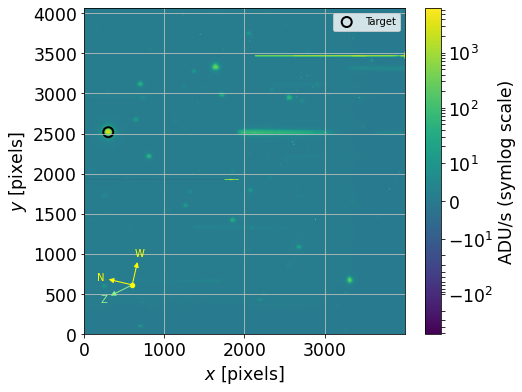

2021-04-01 20:36:20  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 300.07347355 2516.2137658 ]...
2021-04-01 20:36:20  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_RG610_HD75519_2021-03-11_286_wcs/Cor_holo4_003_RG610_HD75519_2021-03-11_286.wcs available, use 2D fit to find target pixel position.
2021-04-01 20:36:20  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                 c0_1        
    ----------------- ------------------- ---------------------
    8.468249017934246 0.00266184151057693 0.0011111522948960518
2021-04-01 20:36:20  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=1.25e-05.
2021-04-01 20

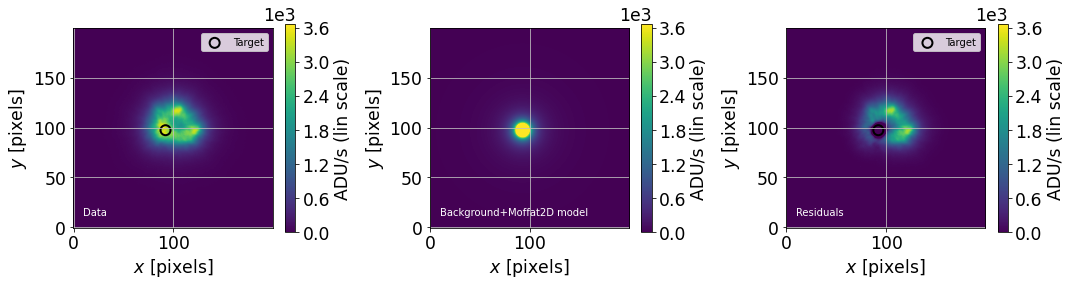

2021-04-01 20:36:21  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=5e-05.


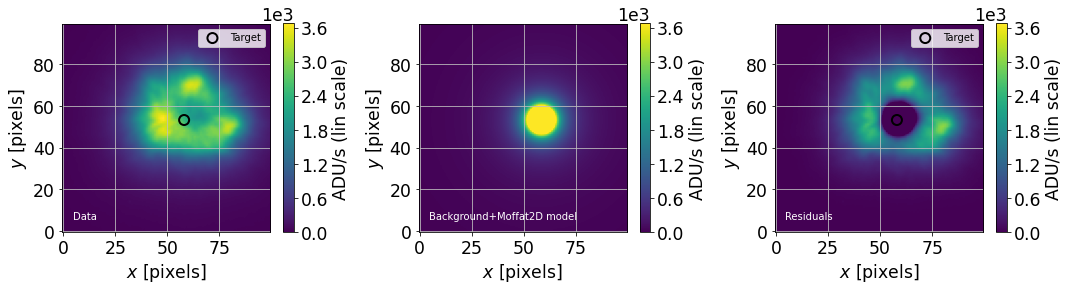

2021-04-01 20:36:22  Image      find_target          INFO   
	X,Y target position in pixels: 300.082,2516.216


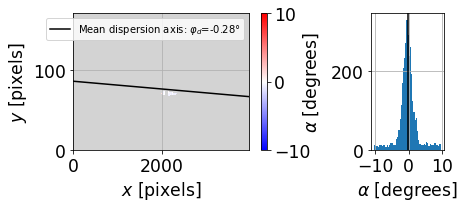

2021-04-01 20:36:23  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.28 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


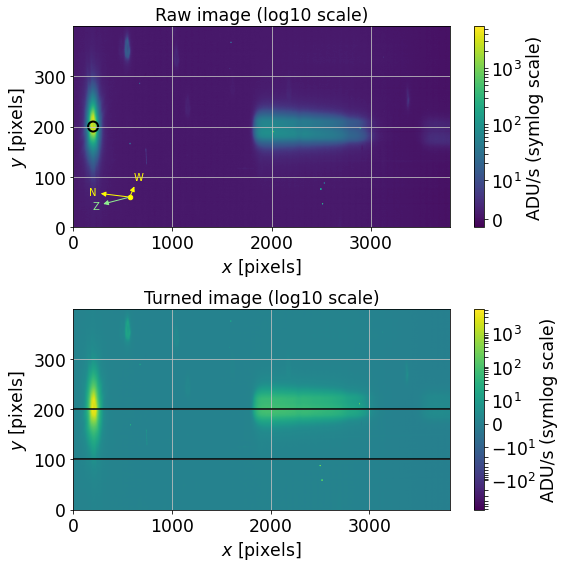

2021-04-01 20:36:33  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-01 20:36:33  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0               c0_1       
    ----------------- ------------------- ------------------
    99.41660908722675 0.22087955160440134 0.4850810222321994
2021-04-01 20:36:33  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 1 iterations because the relative change of cost is below ftol=5e-05.


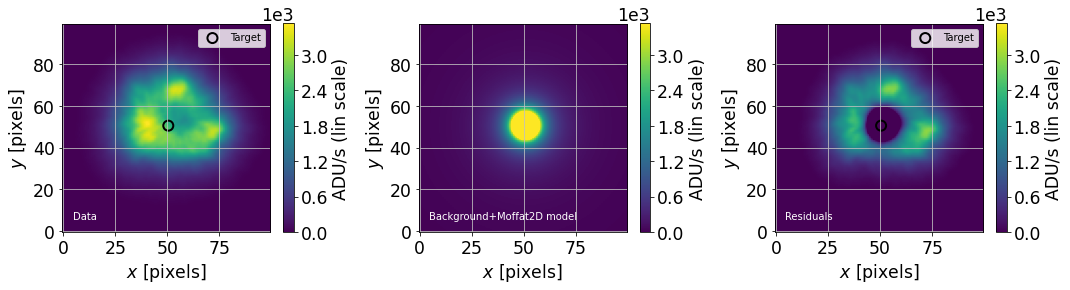

2021-04-01 20:36:34  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 2 iterations because the relative change of cost is below ftol=0.0002.


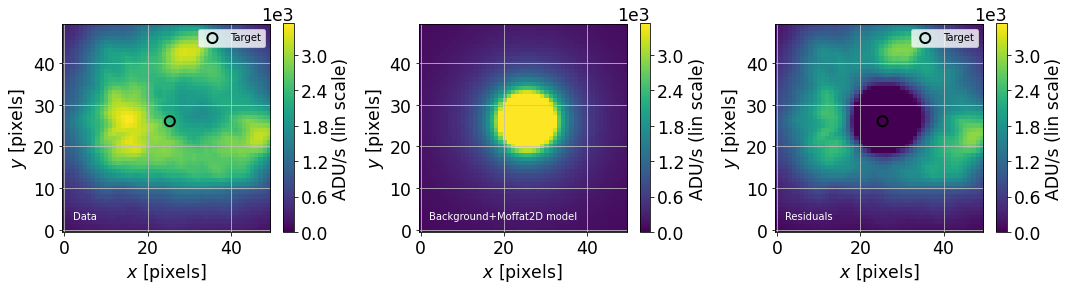

2021-04-01 20:36:35  Image      find_target          INFO   
	X,Y target position in pixels: 307.352,2518.064
2021-04-01 20:36:35  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-01 20:36:35  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-04-01 20:36:35  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-01 20:36:35  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1856:3326,2338:2698] (size (1470, 360))


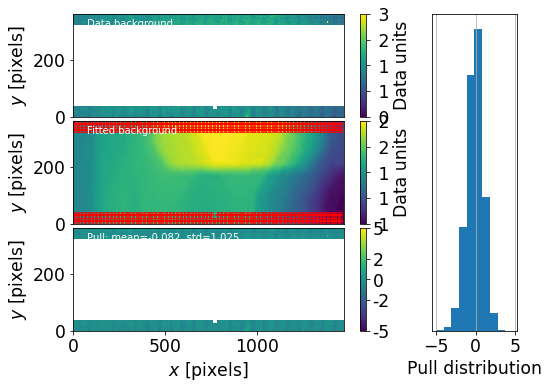

2021-04-01 20:36:38  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-04-01 20:36:50  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-7.72108294361257).
2021-04-01 20:36:50  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-04-01 20:36:50  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (3.0).
2021-04-01 20:36:50  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (2.0).
2021-04-01 20:36:50  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent terminated in 0 iterations because all parameters have null Jacobian.
2021-04-01 20:36:50  spectra

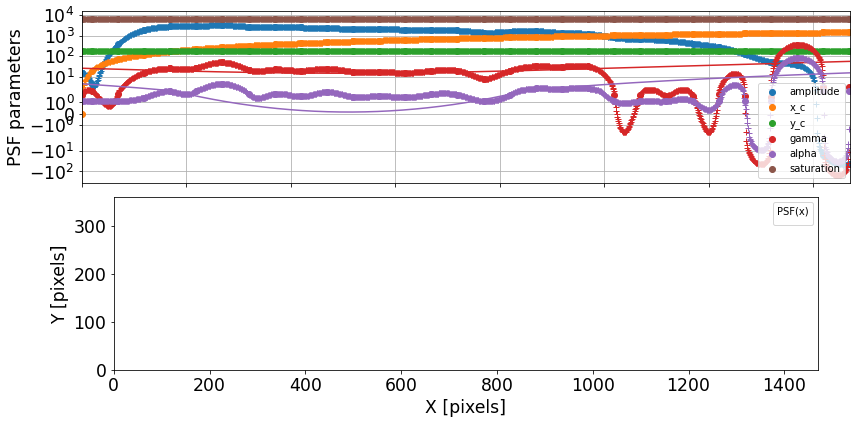

2021-04-01 20:36:59  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.9628e+06 initial chisq_red=50.389
		 Line search: alpha_min=0.382 iter=3 funcalls=7
	Parameter shifts: [ -0.5955663    0.45976614  -0.06698247  12.76154196 -16.77102807
   8.72201997   1.37286584  -2.31231989   1.25887019]
	New parameters: [  0.72044032  -2.69975965   0.10126119  34.18965533 -25.28044073
  11.79973685   3.46783259  -2.45153772   1.91269325]
	Final cost=2.5438e+06 final chisq_red=43.262 computed in 1.73s
2021-04-01 20:37:00  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=2.5438e+06 initial chisq_red=43.262
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ -0.99595258   0.36151817  -0.17383091   0.51797801  17.99598454
 -23.61521013  -0.95982631   2.39874334  -3.68760734]
	New parameters: [ -0.27551225  -2.33824148  -0.07256972  34.70763334  -7.2844562
 -11.81547328   2.50800628  -0.05279438  -1.77491409]
	Final cost=1.524

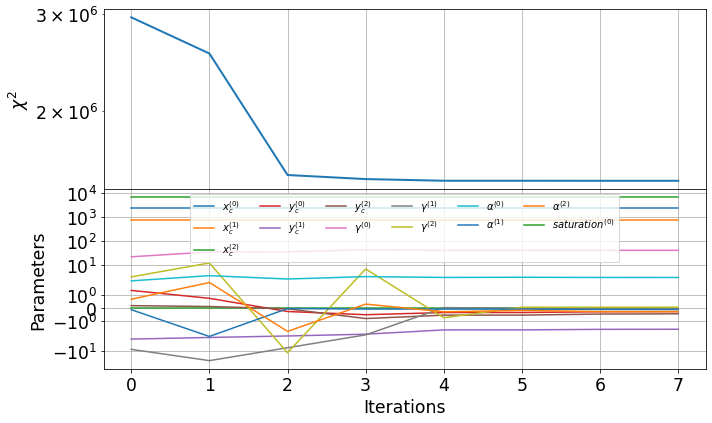

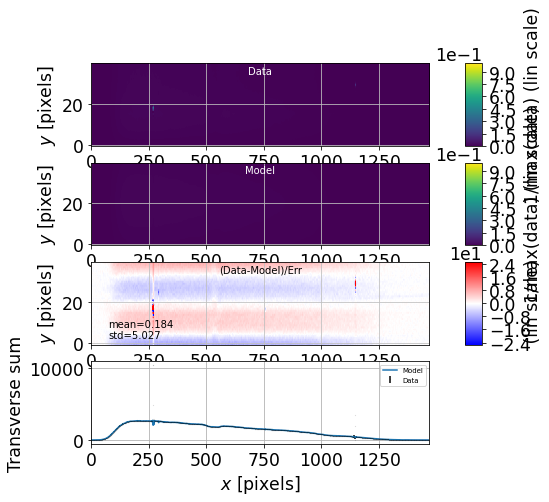

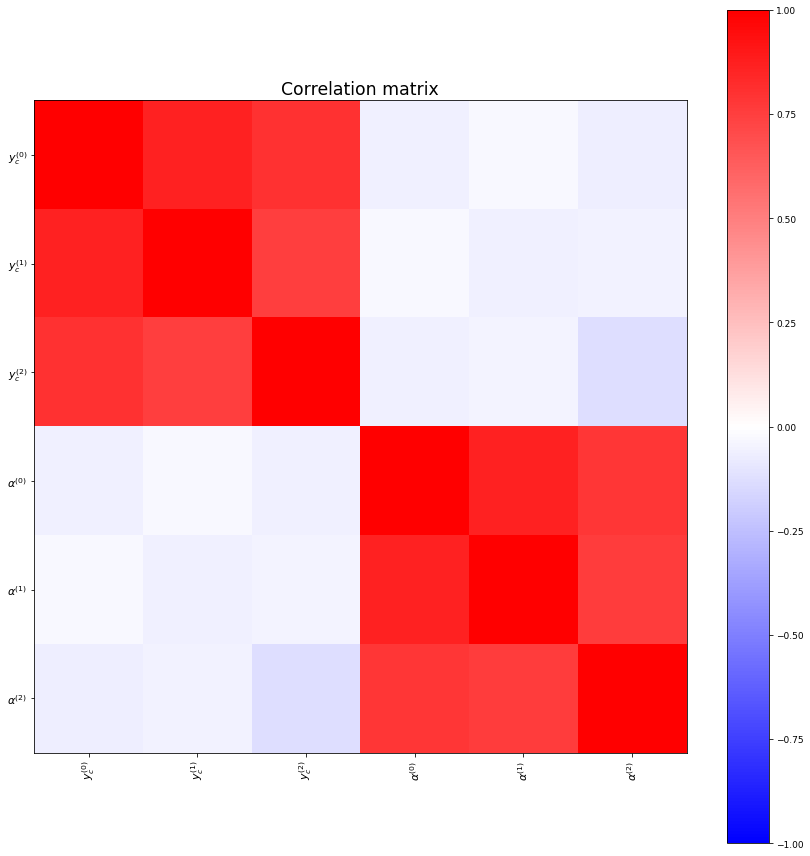

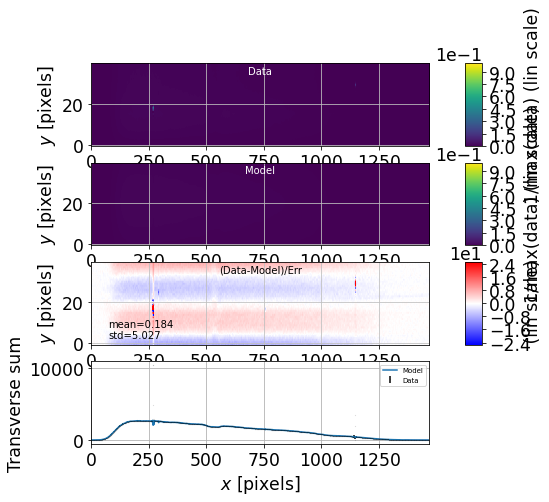

2021-04-01 20:37:16  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c   ...          Dy         Dy_disp_axis
------------------- ------ ... ------------------- ------------
   9.82519883300716    0.0 ...  0.8829532802818676          0.0
   5.85022327790192    1.0 ...  0.8825901416115869          0.0
 1.6385730212297145    2.0 ...  0.8822245018820354          0.0
  4.499873796829154    3.0 ...  0.8818563610931562          0.0
  5.016983692870197    4.0 ...  0.8814857192449779          0.0
 10.462847672993824    5.0 ...  0.8811125763375287          0.0
 3.7748917703945817    6.0 ...  0.8807369323707519          0.0
  3.896380243932257    7.0 ...  0.8803587873446759          0.0
 14.348240295928031    8.0 ...  0.8799781412593006          0.0
 3.0994099749274047    9.0 ...  0.8795949941146546          0.0
                ...    ... ...                 ...          ...
  6.145716535209395 1459.0 ...  -2.307

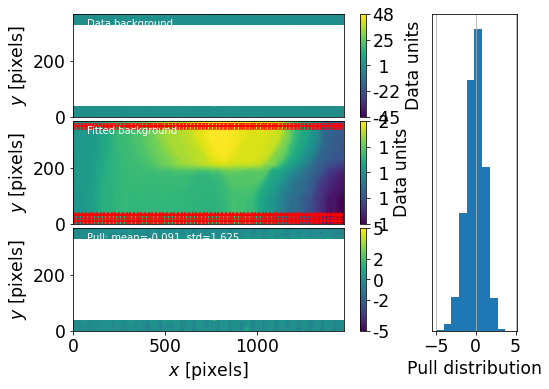

2021-04-01 20:37:19  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.419 ADU/s, RMS=0.414 ADU/s.
2021-04-01 20:37:19  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1848:3318,2322:2690] (size (1470, 368))
	New target position in spectrogram frame: [-1547.9180142959647, 194.21576549206566]


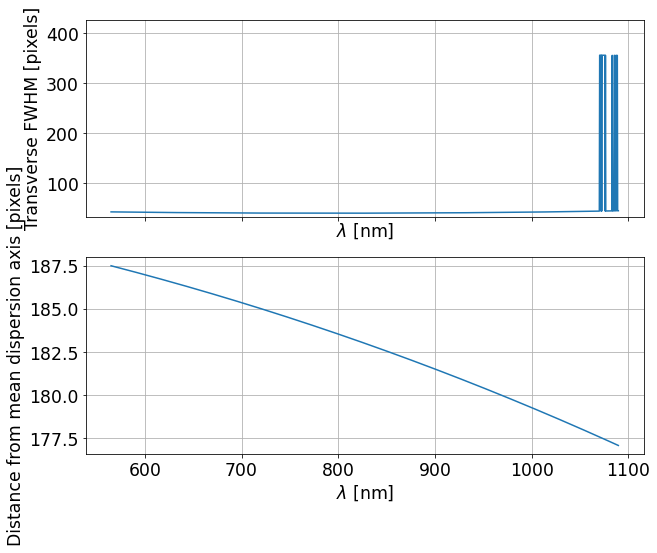

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


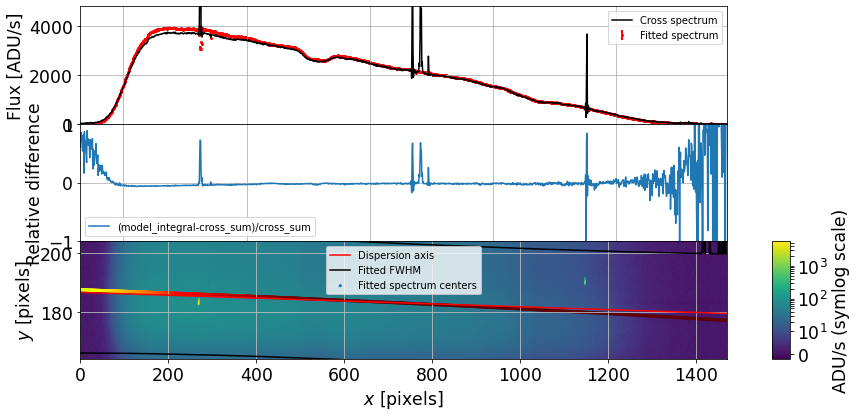

2021-04-01 20:37:21  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


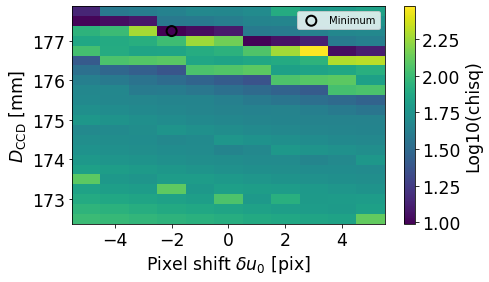

spectrum/calibrate_spectrum::pixel_shift_step= 1.0
spectrum/calibrate_spectrum::parameters.DISTANCE2CCD_ERR= 0.5
spectrum/calibrate_spectrum::error= (0.5, 1.0)
spectrum/calibrate_spectrum::start= [177.2480011  -2.       ]


2021-04-01 20:37:44  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -2.000pix
	D = 177.179 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, 4.4 sigma shift)
2021-04-01 20:37:44  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-01 20:37:44  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_286_spectrum.fits
2021-04-01 20:37:44  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_286_spectrogram.fits


   Line   Tabulated  Detected   Shift    ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm        nm     ...  reduced       nm          nm     
--------- --------- --------- ---------- ... --------- ----------- ------------
$H\alpha$  656.3486  655.3269  -1.021634 ... 14.756994  0.31400436   0.29566723
 $O_2(B)$   687.472  676.0674 -11.404645 ... 14.756994  0.21048413   0.45198208
              760.3  754.9744  -5.325584 ... 0.7925776  0.53483766  -0.30183634
 $O_2(Z)$   822.696  816.3409 -6.3551035 ... 1.5173639  0.11402407   0.43456355
 $O_2(Y)$   898.765 907.29425   8.529222 ... 4.1390505  0.28328934     3.447214
  $H_2 O$     935.0 924.13544 -10.864536 ... 4.1390505   6.9085135     4.824183


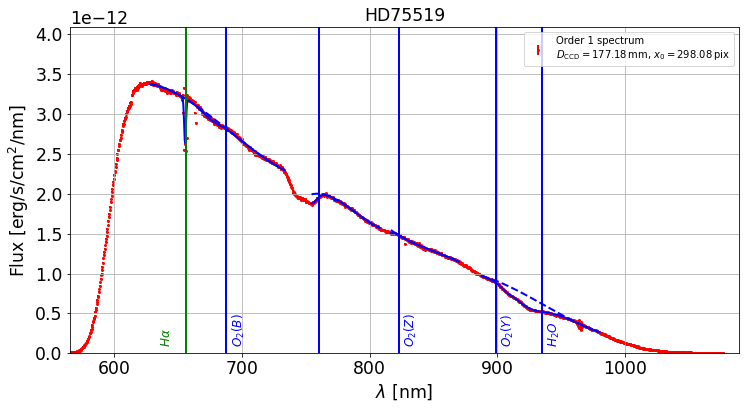

In [32]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)